<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/hyperopt_optuna_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials, plotting
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest)
best = fmin(fn=f, space=fspace, algo=rand.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

#for trial in trials.trials[:2]:
#    print(trial)




100%|██████████| 1000/1000 [00:01<00:00, 939.95it/s, best loss: 6.141476849483132e-05]
best: {'x': -0.007836757524310123}
 trials:


In [10]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 7.773828858569977, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-2.788158686045322]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 2, 10, 16, 32, 693000), 'refresh_time': datetime.datetime(2020, 12, 2, 10, 16, 32, 693000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 18.315869860722877, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [-4.279704412774658]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 2, 10, 16, 32, 695000), 'refresh_time': datetime.datetime(2020, 12, 2, 10, 16, 32, 695000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 24.304945685676266, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdi

avg best error: 6.141476849483132e-05


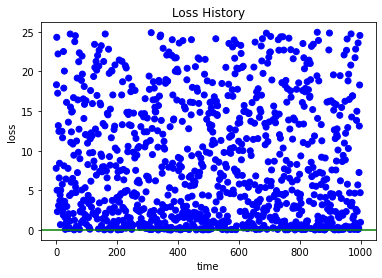

In [11]:
plotting.main_plot_history(trials)

Showing Histogram of 1000 jobs


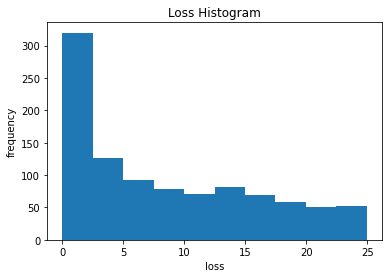

In [12]:
plotting.main_plot_histogram(trials)

finite loss range 6.141476849483132e-05 24.9427015003102 -0.9999385852315051


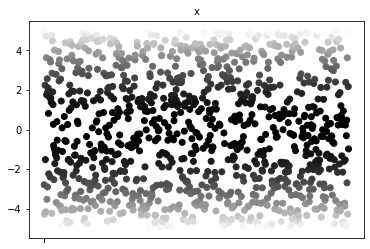

In [13]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$x$')

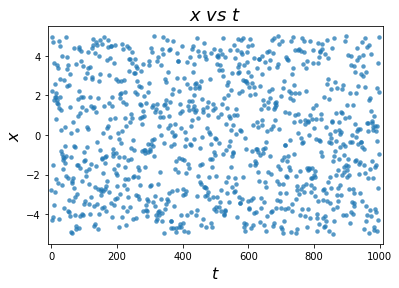

In [14]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

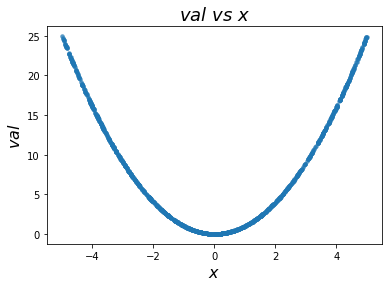

In [15]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [16]:
# install optuna
! pip install optuna

     |████████████████████████████████| 266kB 8.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 163kB 10.1MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 133kB 15.9MB/s 
     |████████████████████████████████| 112kB 18.5MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
  Created wheel for optuna: filename=optuna-2.3.0-cp36-none-any.whl size=359761 sha256=4a8f88f322641b71a968473f62b1dbf53f71dade9ae4c569daa94cb0d2b67a3a
  Stored in directory: /root/.cache/pip/wheels/fa/91/19/64b0ec6b964f89c0695a9dc6db6f851d0b54c5381a5c9cadfb
Successfully built optuna
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=e1d0a8589030c031cba32562ce653c38971e65d2754028be7ff89590c372e1b4
  Stored in directory: /root/.cache/pip/whe

In [17]:


import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)



    return (x - 2) ** 2 + (y-1) ** 2

study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=100)

study.best_params  # E.g. {'x': 1.7867602526129278, 'y': 1.0872101494664252}

[I 2020-12-02 10:16:52,537] A new study created in memory with name: no-name-2cb8f4de-f0cb-41d5-b0c8-6d3d485fc0bc
[I 2020-12-02 10:16:52,539] A new study created in memory with name: no-name-3d43e589-9b76-459f-8a2b-8939709c5eb3
[I 2020-12-02 10:16:52,547] Trial 0 finished with value: 44.710743985720214 and parameters: {'x': 2.3556200288740357, 'y': 7.677145975698288}. Best is trial 0 with value: 44.710743985720214.
[I 2020-12-02 10:16:52,548] Trial 1 finished with value: 142.0132660765558 and parameters: {'x': -9.017064055881095, 'y': -3.542858754701557}. Best is trial 0 with value: 44.710743985720214.
[I 2020-12-02 10:16:52,551] Trial 2 finished with value: 178.05011604258084 and parameters: {'x': -6.517123893513084, 'y': -9.271743601995201}. Best is trial 0 with value: 44.710743985720214.
[I 2020-12-02 10:16:52,553] Trial 3 finished with value: 4.4010703782301 and parameters: {'x': 3.558258095472162, 'y': -0.40460032967587267}. Best is trial 3 with value: 4.4010703782301.
[I 2020-12-

{'x': 2.1213347841327796, 'y': 1.039514502591162}

## Visualizing the Optimization History

In [18]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [19]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [20]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [21]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [22]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [23]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)